# DS-NYC-45 | Unit Project 2: Exploratory Data Analysis

In this project, you will implement the exploratory analysis plan developed in Unit Project 1.  This will lay the groundwork for our our first modeling exercise in Unit Project 3.

First, load the python libraries you will need for this project:

In [50]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import numpy as np

pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', 10)
pd.set_option('display.notebook_repr_html', True)

%matplotlib inline
plt.style.use('ggplot')

Then, read in your dataset:

In [51]:
df = pd.read_csv('dataset/ucla-admissions.csv')

df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


## Questions

> ### Question 1.  How many observations are in our dataset?

>>**Answer: There are 400 observations in our dataset. We can find that number by using .info(), .describe() or len()**

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 4 columns):
admit       400 non-null int64
gre         398 non-null float64
gpa         398 non-null float64
prestige    399 non-null float64
dtypes: float64(3), int64(1)
memory usage: 15.6 KB


In [53]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [54]:
len(df)

400

> ### Question 2.  Create a summary table.

>>**Answer:**

In [55]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


> ### Question 3.  Why would `gre` have a larger variance than `gpa`?

>>**Answer: 'gre' has a larger variance than 'gpa' because 'gre' has a much wider range of values.**
**In this dataset: (GRE range: 220-800); (GPA range: 2.26-4.00)**

In [56]:
variable_list = list(df.columns)

for var in variable_list:
    print var + ' Variance: ' + str(round(df[var].var(), 2))

admit Variance: 0.22
gre Variance: 13369.95
gpa Variance: 0.14
prestige Variance: 0.89


> ### Question 4.  Drop data points with missing data.

In [57]:
df_less_na = df.copy().dropna(how='any')

> ### Question 5.  Confirm that you dropped the correct data.  How can you tell?

>>**Answer: Use .isnull().sum() to get the total null values for each column**

In [58]:
df_less_na.isnull().sum()

admit       0
gre         0
gpa         0
prestige    0
dtype: int64

> ### Question 6.  Create boxplots for `gre` and `gpa`.

>>**Answer:**

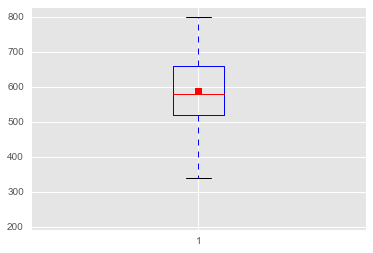

In [78]:
# 'gre'

fig2, ax = plt.subplots()

plt.boxplot(df_less_na['gre'], showmeans=True)
ax.margins(y=0.05);

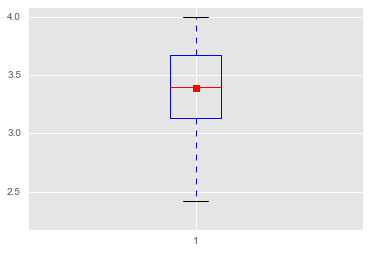

In [79]:
# 'gpa'
fig3, ax = plt.subplots()

plt.boxplot(df_less_na['gpa'], showmeans=True)
ax.margins(y=0.05);

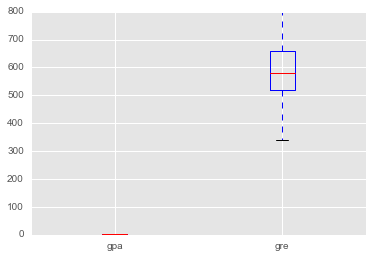

In [61]:
# BOTH on same plot - can't see gpa b/c it's range is so much smaller

df_less_na.boxplot(column=['gpa', 'gre'], return_type='axes');

> ### Question 7.  What do boxplots show?

>>**Answer:
Boxplots are a visial representation of some of the key characteristics of a data set. They show us the following (displayed top-down in the plots above:**

>>**- Max (top 'T' line)**

>>**- 3rd Quartile (top of blue rectangle)**

>>***- (optional) Arithmetic Mean (red square)***

>>**- Median (red line in middle of blue rectangle)**

>>**- 1st Quartile (bottom of blue rectangle)**

>>**- Min (bottom 'T' line)**

> ### Question 8.  Plot the distribution of each variable.

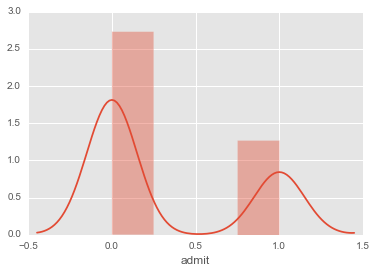

In [62]:
sns.distplot(df_less_na['admit']);

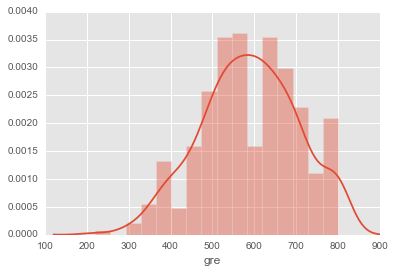

In [63]:
sns.distplot(df_less_na['gre']);

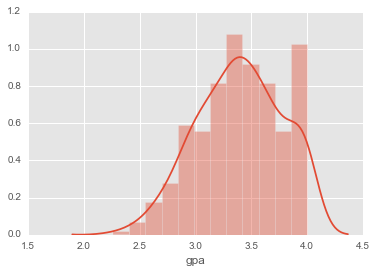

In [64]:
sns.distplot(df_less_na['gpa']);

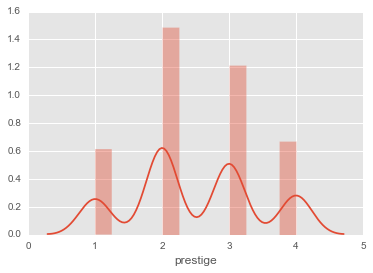

In [65]:
sns.distplot(df_less_na['prestige']);

> ### Question 9.  If our model had an assumption of a normal distribution for `gre` and `gpa`, would we meet that requirement?  Would their distributions need correction?  If so, why, why not?  How?

>>**Answer: According to the mstats.normaltest(), 'gre' IS normally distributed but 'gpa' is NOT normally distributed (using 0.05 as the p-value max).**

>>**'gre' is normally distributed so it would not need correction.**

>>**'gpa' is NOT normally distributed so it would need correction.**

In [66]:
from scipy.stats import mstats

var_list = ['gre', 'gpa']
p_max = 0.05
"""Traditionally, in statistics, you need a p-value of less than 0.05 to
reject the null hypothesis.  In this case, the null hypothesis was
normality.  Because our p value is greater than 0.05 (actually, it's
greater than 0.10), we cannot reject the null hypothesis.  Therefore,
we have not proven that this data set is different from normality.
http://mathforum.org/library/drmath/view/72065.html"""

for var in var_list:
    z, p_val = mstats.normaltest(df_less_na[var])
    if p_val < p_max:
        print var + ' is NOT normally distributed: ' + str(p_val)
    else:
        print var + ' IS normally distributed: ' + str(p_val)

gre IS normally distributed: 0.148229806138
gpa is NOT normally distributed: 0.00144457837723


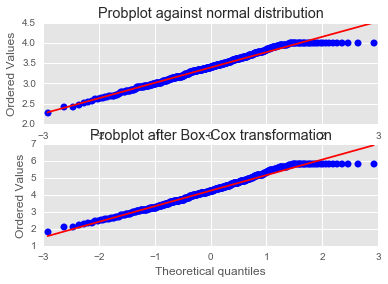

In [81]:
from scipy import stats

fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)

x = df_less_na['gpa']

stats.probplot(x, dist=stats.norm, plot=ax1)

ax1.set_xlabel('')
ax1.set_title('Probplot against normal distribution')

ax2 = fig.add_subplot(2, 1, 2)

xt, _ = stats.boxcox(x)

stats.probplot(xt, dist=stats.norm, plot=ax2)

ax2.set_title('Probplot after Box-Cox transformation');

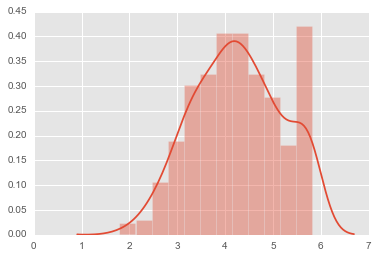

In [82]:
sns.distplot(norm_gpa);

In [69]:
z, p_val = mstats.normaltest(xt)
if p_val < p_max:
    print 'norm_gpa is NOT normally distributed: ' + str(p_val)
else:
    print 'norm_gpa IS normally distributed: ' + str(p_val)

norm_gpa is NOT normally distributed: 1.86126249113e-05


> ### Question 10.  Create a correlation matrix for the dataset

>>**Answer:**

In [30]:
df_less_na.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


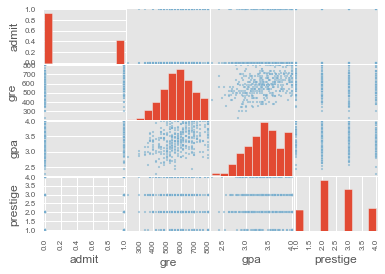

In [35]:
from pandas.tools.plotting import scatter_matrix
scatter_matrix(df_less_na);

> ### Question 11.  What did you find?  Which of our variables are potentially colinear?

>>**Answer: The strongest correlation between two variables is 0.38 for gpa & gre. The strongest correlation with admit is prestige (-0.24 - rank is 1-4 high to low).** 

> ### Question 12.  Write an analysis plan for exploring the association between graduate school admission rates and prestige of undergraduate schools.

>>**Answer: We will use one-hot encoding to individually weight each level in the categorical variable 'prestige' then perform a logistic regression from statsmodels and calculate/interpret the odds ratios for each.**

In [45]:
pd.crosstab(df_less_na['admit'], df_less_na['prestige'], rownames=['admit'])

prestige,1.0,2.0,3.0,4.0
admit,,,,
0,28,95,93,55
1,33,53,28,12


> ### Question 13.  What is your hypothesis?

>>**Answer: Applicants from more prestigious undergraduate schools will have a higher probability of being admitted than those from less prestigious schools.**